In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# convert json to Pandas dataframe
df = pd.read_json('DALI_Data-Anon.json')
df

,year,gender,heightInches,happiness,stressed,sleepPerNight,socialDinnerPerWeek,alcoholDrinksPerWeek,caffeineRating,affiliated,numOfLanguages,gymPerWeek,hoursOnScreen,phoneType
0,'19,Female,63.0,4,2,7,3.0,4.0,1,1,2,3.0,6.0,iOS
1,'19,Male,71.0,4,5,7,3.0,8.0,6,1,2,4.0,6.0,iOS
2,'19,Female,63.0,4,4,7,3.0,2.0,1,1,1,0.0,9.0,Other
3,'19,Male,70.0,4,5,7,7.0,7.0,8,1,1,3.0,7.0,Android
4,'19,Male,70.0,4,8,7,3.0,3.0,3,1,2,5.0,6.0,iOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,'22,Female,63.0,3,5,7,2.0,1.0,5,0,3,0.0,8.0,iOS
62,'22,Male,71.0,4,8,7,2.0,5.0,1,0,1,2.0,7.0,iOS
63,'22,Female,63.0,3,7,6,3.0,8.0,8,0,2,6.0,7.0,iOS
64,'22,Female,63.0,5,7,8,5.0,2.0,9,0,2,5.0,10.0,iOS


Let's see what our missing data looking like

In [3]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
alcoholDrinksPerWeek,3,4.5
hoursOnScreen,1,1.5
gymPerWeek,1,1.5
socialDinnerPerWeek,1,1.5
heightInches,1,1.5


Because only a few rows have nans, just drop them

In [4]:
# drop categorical data and na # drop na because only a few rows are nan
df = df._get_numeric_data().dropna() 
df.head(5)

,heightInches,happiness,stressed,sleepPerNight,socialDinnerPerWeek,alcoholDrinksPerWeek,caffeineRating,affiliated,numOfLanguages,gymPerWeek,hoursOnScreen
0,63.0,4,2,7,3.0,4.0,1,1,2,3.0,6.0
1,71.0,4,5,7,3.0,8.0,6,1,2,4.0,6.0
2,63.0,4,4,7,3.0,2.0,1,1,1,0.0,9.0
3,70.0,4,5,7,7.0,7.0,8,1,1,3.0,7.0
4,70.0,4,8,7,3.0,3.0,3,1,2,5.0,6.0


In [5]:
df.describe()

,heightInches,happiness,stressed,sleepPerNight,socialDinnerPerWeek,alcoholDrinksPerWeek,caffeineRating,affiliated,numOfLanguages,gymPerWeek,hoursOnScreen
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,66.112903,3.919355,5.322581,6.935484,3.967742,4.435484,4.129032,0.596774,1.838710,3.209677,7.258065
std,2.897737,0.731008,2.148382,0.865949,1.907429,3.637784,3.048697,0.494550,0.853028,1.951352,2.408560
min,61.000000,2.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000
25%,64.000000,4.000000,3.250000,6.000000,3.000000,2.000000,1.000000,0.000000,1.000000,2.000000,6.000000
50%,65.500000,4.000000,6.000000,7.000000,4.000000,4.000000,3.000000,1.000000,2.000000,3.000000,7.000000
75%,68.000000,4.000000,7.000000,7.000000,5.000000,6.750000,6.000000,1.000000,2.000000,5.000000,8.000000
max,72.000000,5.000000,10.000000,9.000000,7.000000,15.000000,10.000000,1.000000,4.000000,7.000000,15.000000


Looks like we have 11 numerical features and 62 data points. We also get a good idea of the ranges for each feature

In [6]:
# find correlation between different variables
corr = df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap=cmap, axis=None).set_precision(2)

,heightInches,happiness,stressed,sleepPerNight,socialDinnerPerWeek,alcoholDrinksPerWeek,caffeineRating,affiliated,numOfLanguages,gymPerWeek,hoursOnScreen
heightInches,1,0.1,-0.045,-0.0036,-0.065,0.15,-0.12,-0.013,0.054,0.0015,0.031
happiness,0.1,1,-0.3,0.043,0.1,-0.13,0.18,-0.14,0.031,0.12,-0.016
stressed,-0.045,-0.3,1,-0.15,0.063,0.14,-0.016,0.032,-0.087,0.031,-0.28
sleepPerNight,-0.0036,0.043,-0.15,1,-0.021,-0.11,-0.16,0.015,-0.059,-0.089,-0.16
socialDinnerPerWeek,-0.065,0.1,0.063,-0.021,1,0.46,0.071,0.25,-0.16,0.0063,-0.17
alcoholDrinksPerWeek,0.15,-0.13,0.14,-0.11,0.46,1,-0.0051,0.39,-0.24,0.16,-0.049
caffeineRating,-0.12,0.18,-0.016,-0.16,0.071,-0.0051,1,-0.11,0.13,0.13,0.15
affiliated,-0.013,-0.14,0.032,0.015,0.25,0.39,-0.11,1,-0.12,-0.11,-0.12
numOfLanguages,0.054,0.031,-0.087,-0.059,-0.16,-0.24,0.13,-0.12,1,-0.088,-0.027
gymPerWeek,0.0015,0.12,0.031,-0.089,0.0063,0.16,0.13,-0.11,-0.088,1,0.12


Looks like the highest correlations are between alcoholic drinks per week, social dinners per week, and affiliation. Let's visualize some of this data

In [7]:
perc_affiliated = round(len(df[df['affiliated'] == 1]) / len(df), 2)
perc_not_affiliated = round(len(df[df['affiliated'] == 0]) / len(df), 2)

print('proportion of Dali members affiliated: ' + str(perc_affiliated))
print('proportion of Dali members not affiliated: ' + str(perc_not_affiliated))

proportion of Dali members affiliated: 0.6
proportion of Dali members not affiliated: 0.4


In [8]:
df_alcohol = df[['alcoholDrinksPerWeek','affiliated']]
# list of drinks per week for affiliated and non-affiliated Dali members
alcohol_aff = df_alcohol[df_alcohol['affiliated'] == 1]['alcoholDrinksPerWeek']
alcohol_not_aff = df_alcohol[df_alcohol['affiliated'] == 0]['alcoholDrinksPerWeek']

# display some stats
print('Stats for Alcoholic Drinks Per Week for Affiliated Members: ')
print('range: ' + str(min(alcohol_aff)) + " to " + str(max(alcohol_aff)))
print('mean: ' + str(round(np.mean(alcohol_aff), 1)))
print('standard deviation: ' + str(round(np.std(alcohol_aff), 1)))
print('median: ' + str(round(np.median(alcohol_aff), 1)))

print('\n')

print('Stats for Alcoholic Drinks Per Week for Not Affiliated Members: ')
print('range: ' + str(min(alcohol_not_aff)) + " to " + str(max(alcohol_not_aff)))
print('mean: ' + str(round(np.mean(alcohol_not_aff), 1)))
print('standard deviation: ' + str(round(np.std(alcohol_not_aff), 1)))
print('median: ' + str(round(np.median(alcohol_not_aff), 1)))

Stats for Alcoholic Drinks Per Week for Affiliated Members: 
range: 0.0 to 15.0
mean: 5.6
standard deviation: 3.9
median: 5.0


Stats for Alcoholic Drinks Per Week for Not Affiliated Members: 
range: 0.0 to 8.0
mean: 2.7
standard deviation: 2.3
median: 2.0


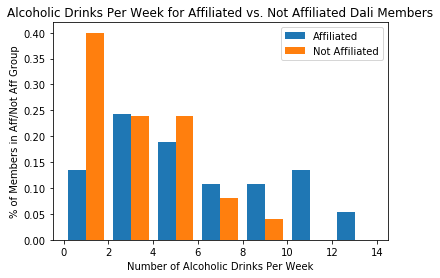

In [9]:
# plot histogram of drinks per week for affiliated and not affiliated members
bins = [i for i in range(0, 16, 2)] # number of drinks, bucketed by 2
weights_aff = np.ones(len(alcohol_aff))/len(alcohol_aff)
weights_not_aff = np.ones(len(alcohol_not_aff))/len(alcohol_not_aff)
plt.hist([alcohol_aff, alcohol_not_aff], bins=bins, label=['Affiliated', 'Not Affiliated'], weights=[weights_aff, weights_not_aff])
plt.legend(loc='upper right')
plt.title("Alcoholic Drinks Per Week for Affiliated vs. Not Affiliated Dali Members")
plt.xlabel("Number of Alcoholic Drinks Per Week")
plt.ylabel("% of Members in Aff/Not Aff Group")
plt.show()

In [10]:
df_dins = df[['socialDinnerPerWeek','affiliated']]
# list of dinners per week for affiliated and non-affiliated Dali members
dins_aff = df_dins[df_dins['affiliated'] == 1]['socialDinnerPerWeek']
dins_not_aff = df_dins[df_dins['affiliated'] == 0]['socialDinnerPerWeek']

# display some stats
print('Stats for Social Dinners Per Week for Affiliated Members: ')
print('range: ' + str(min(dins_aff)) + " to " + str(max(dins_aff)))
print('mean: ' + str(round(np.mean(dins_aff), 1)))
print('standard deviation: ' + str(round(np.std(dins_aff), 1)))
print('median: ' + str(round(np.median(dins_aff), 1)))

print('\n')

print('Stats for Social Dinners Per Week for Not Affiliated Members: ')
print('range: ' + str(min(dins_not_aff)) + " to " + str(max(dins_not_aff)))
print('mean: ' + str(round(np.mean(dins_not_aff), 1)))
print('standard deviation: ' + str(round(np.std(dins_not_aff), 1)))
print('median: ' + str(round(np.median(dins_not_aff), 1)))

Stats for Social Dinners Per Week for Affiliated Members: 
range: 1.0 to 7.0
mean: 4.4
standard deviation: 1.8
median: 4.0


Stats for Social Dinners Per Week for Not Affiliated Members: 
range: 0.0 to 7.0
mean: 3.4
standard deviation: 1.9
median: 3.0


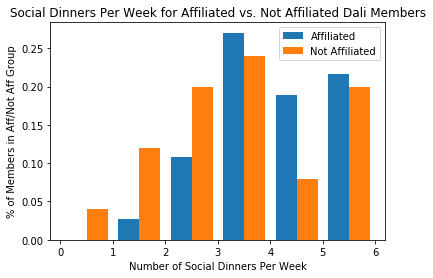

In [11]:
# plot histogram of social dinners per week for affiliated and not affiliated members
bins = [i for i in range(0, 7)] # number of dinners
weights_aff = np.ones(len(dins_aff))/len(dins_aff)
weights_not_aff = np.ones(len(dins_not_aff))/len(dins_not_aff)
plt.hist([dins_aff, dins_not_aff], bins=bins, label=['Affiliated', 'Not Affiliated'], weights=[weights_aff, weights_not_aff])
plt.legend(loc='upper right')
plt.title("Social Dinners Per Week for Affiliated vs. Not Affiliated Dali Members")
plt.xlabel("Number of Social Dinners Per Week")
plt.ylabel("% of Members in Aff/Not Aff Group")
plt.show()

Let's see if we can try to predict whether a member is affiliated based on the other features. First let's try and select the best features to reduce noise and overfitting. From the correlation heatmap and histograms above, we can already guess that alcoholic drinks per week (1st best) and social dinners per week (2nd best) might be the best predictors. Let's use a chi-square test by using sklearn's SelectKBest to look at the potential best features to use for this model

In [12]:
from sklearn.feature_selection import SelectKBest, chi2

X_orig = df.drop(['affiliated'], axis=1) # all features except affiliated
y = np.ravel(df['affiliated'])

best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X_orig, y)

#concat features and scores into a dataframe
columns = pd.DataFrame(X_orig.columns)
scores = pd.DataFrame(fit.scores_)
feature_scores = pd.concat([columns, scores],axis=1)
feature_scores.columns = ['Features', 'Scores']  #naming the dataframe columns
feature_scores.sort_values(by=['Scores'], ascending=False, inplace=True)
feature_scores

,Features,Scores
5,alcoholDrinksPerWeek,27.794716
4,socialDinnerPerWeek,3.403208
6,caffeineRating,1.550828
8,gymPerWeek,0.953747
9,hoursOnScreen,0.674835
7,numOfLanguages,0.335173
1,happiness,0.155573
2,stressed,0.053674
3,sleepPerNight,0.001448
0,heightInches,0.001405


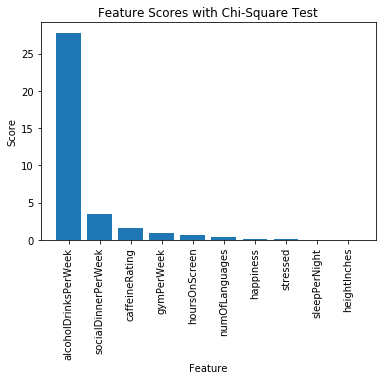

In [13]:
# plot this dataframe
x_pos = np.arange(len(feature_scores))
plt.bar(x=x_pos, height=feature_scores['Scores'], tick_label=feature_scores['Features'])
plt.title('Feature Scores with Chi-Square Test')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show() 

I decided to use the top 4 features - alcoholic drinks per week, social dinners per week, caffeine rating, and gym hours per week. As we can see, alcoholic drinks per week is by far the best feature, which supports our findings so far. Since this is a classification without a lot of data, we will try support vector machines, k nearest neighbors, and random forest

In [14]:
# update to use these 4 features for the below models
X = X_orig[['alcoholDrinksPerWeek', 'socialDinnerPerWeek', 'caffeineRating', 'gymPerWeek']]
y = y # same as previous cell

In [15]:
# svm
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn import svm

# run following many times to get more accurate accuracy metric
num_trials = 20 # would do higher if I had more computation power
total_accuracies = []
n_splits = 5 # for kfold; only 62 data points so want a decent number (12) to test on

for i in range(num_trials):
    kf = KFold(n_splits=n_splits, shuffle=True) # use k-fold cross validation
    pipe = Pipeline([('normalizer', Normalizer()), ('StandardScaler', StandardScaler()), ('clf', svm.SVC())])
    # perform a grid search to get the best hyperparameters
    grid_param = { 
        'clf__gamma': [2**-3, 2**-1, 2**1, 2**3, 2**5, 2**7, 2**9, 'scale', 'auto'],
        'clf__C': [2**-3, 2**-1, 2**1, 2**3, 2**5, 2**7, 2**9], 
        'clf__kernel': ['linear', 'rbf'], # don't have the computing power to try non-linear (poly)
    }
    gd_sr = GridSearchCV(estimator=pipe, param_grid=grid_param, scoring='accuracy', cv=kf)
    gd_sr.fit(X, y) # keep track of gd_sr.best_params_ if we were to actually use the model to predict
    
    total_accuracies.append(gd_sr.best_score_)
    
# find best parameters and corresponding score
acc_svm = np.mean(total_accuracies)
print('support vector machines accuracy', acc_svm)

/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/michaelzhou/opt/anaconda3/lib/pyt

support vector machines accuracy 0.6653225806451613


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
# now let's try with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


# run following many times to get more accurate accuracy metric
num_trials = 20 # would do higher if I had more computation power
total_accuracies = []
n_splits = 5 # for kfold

for i in range(num_trials):
    kf = KFold(n_splits=n_splits, shuffle=True) # use k-fold cross validation
    pipe = Pipeline([('normalizer', Normalizer()), ('StandardScaler', StandardScaler()), ('clf', KNeighborsClassifier())])
    # perform a grid search to get the best hyperparameters
    grid_param = { 
        'clf__n_neighbors': [3, 4, 5, 6, 7, 8], # most important parameter
        'clf__weights': ['uniform', 'distance'],
        'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    gd_sr = GridSearchCV(estimator=pipe, param_grid=grid_param, scoring='accuracy', cv=kf)
    gd_sr.fit(X, y)

    total_accuracies.append(gd_sr.best_score_)
    
# find best parameters and corresponding score
acc_knn = np.mean(total_accuracies)
print('k nearest neighbors accuracy', acc_knn)

/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/michaelzhou/opt/anaconda3/lib/pyt

k nearest neighbors accuracy 0.6629032258064517


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
# now let's try with random forest
from sklearn.ensemble import RandomForestClassifier

# run following many times to get more accurate accuracy metric
num_trials = 20 # would do higher if I had more computation power
total_accuracies = []
n_splits = 5 # for kfold

for i in range(num_trials):
    kf = KFold(n_splits=n_splits, shuffle=True) # use k-fold cross validation
    pipe = Pipeline([('normalizer', Normalizer()), ('StandardScaler', StandardScaler()), ('clf', RandomForestClassifier())])
    # perform a grid search to get the best hyperparameters
    grid_param = { 
        # would check more parameters with more numbers if I had more computing power
        # already zoomed into numerical areas for n_estimators and max_depth
        'clf__n_estimators': [8, 12, 16, 20],
        'clf__max_depth': [2, 3, 4]
    }

    gd_sr = GridSearchCV(estimator=pipe, param_grid=grid_param, scoring='accuracy', cv=kf)
    gd_sr.fit(X, y)
    print(gd_sr.best_params_)
    total_accuracies.append(gd_sr.best_score_)
    
# find best parameters and corresponding score
acc_rf = np.mean(total_accuracies)
print('random forest accuracy', acc_rf)

/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 8}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 20}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 4, 'clf__n_estimators': 8}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 4, 'clf__n_estimators': 8}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 16}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 12}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 8}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 4, 'clf__n_estimators': 12}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 3, 'clf__n_estimators': 12}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 12}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 8}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 16}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 12}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 3, 'clf__n_estimators': 8}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 8}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 4, 'clf__n_estimators': 16}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 20}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 4, 'clf__n_estimators': 16}


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'clf__max_depth': 2, 'clf__n_estimators': 12}
{'clf__max_depth': 3, 'clf__n_estimators': 16}
random forest accuracy 0.6524193548387097


/Users/michaelzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


support vector machines, k nearest neighbors, and random forest all give about the same accuracy (66-68%) -- let's do some more in depth analysis on random forest by fitting it on our best grid search parameters and looking at some data. First we'll revisit feature importance based on random forest to confirm we chose good features.

In [18]:
rf = RandomForestClassifier(n_estimators=8, max_depth=3)
rf.fit(X_orig, y) # run with all features

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Random forest feature importance:

In [19]:
importances = pd.DataFrame({'feature':X_orig.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
socialDinnerPerWeek,0.232
alcoholDrinksPerWeek,0.165
numOfLanguages,0.120
gymPerWeek,0.115
heightInches,0.095
stressed,0.092
caffeineRating,0.068
hoursOnScreen,0.054
sleepPerNight,0.051


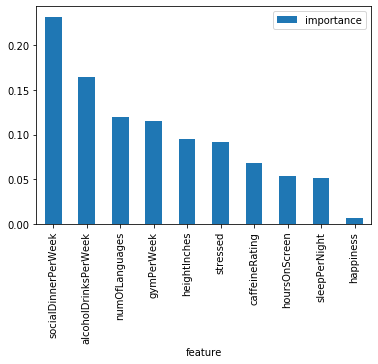

In [20]:
importances.plot.bar()

Looks like we did a good job at picking out features. Now let's look at other result metrics -- the confusion matrix, precision, recall 

In [21]:
rf = RandomForestClassifier(n_estimators=12, max_depth=2)
rf.fit(X, y) # now use the 4 best features again

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(rf, X, y, cv=5)
confusion_matrix(y, predictions)

array([[ 9, 16],
       [ 4, 33]])

In [23]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y, predictions))
print("Recall:", recall_score(y, predictions))

Precision: 0.673469387755102
Recall: 0.8918918918918919


In [24]:
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y, predictions))

F1 score: 0.7674418604651163
